In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# matplotlib 시각화 결과를 jupyter notebook에서 바로 확인하기 위한 코드 작성 
%matplotlib inline

In [2]:
import matplotlib.font_manager as fm

font_dirs = ['./NanumGothic.ttf', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [3]:
data = pd.read_csv("./dataset/steam.csv")
game = data
# 데이터프레임의 크기를 확인합니다.
print(game.shape)

# 데이터프레임 상위 5개 값 확인
game.head()

(27075, 18)


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [5]:
# 컬럼별 결측치 한번 더 확인해보기
game.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [6]:
# 필요없는 컬럼 삭제
game = game.drop(['appid','english','median_playtime'],axis='columns') 

game.head()

,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,owners,price
0,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,10000000-20000000,7.19
1,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,5000000-10000000,3.99
2,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,5000000-10000000,3.99
3,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,5000000-10000000,3.99
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,5000000-10000000,3.99


## 🔹연도별 판매량

#### - release_date 데이터 타입 변경 및 연도별 게임 발매 수 확인
#### - 연도별 판매량으로 게임산업이 급격하게 발전해왔다는 인사이트 도출할 수 있음!!

Text(0.5, 1.0, 'released by year')

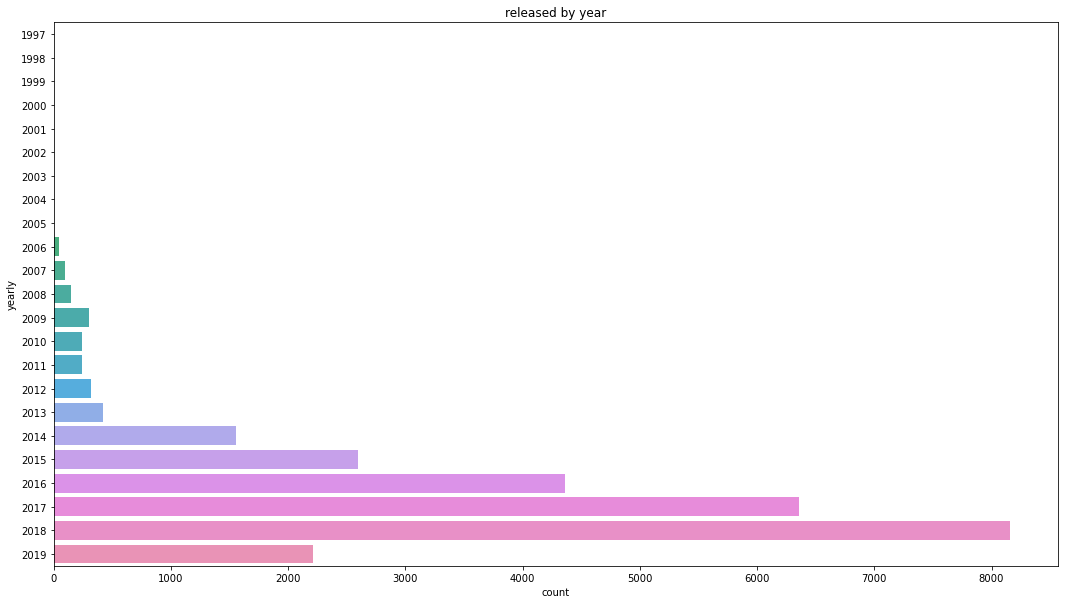

In [7]:
game['release_date'] = pd.to_datetime(game['release_date'])

game['yearly'] = game['release_date'].dt.year

plt.figure(figsize=(18,10))

plt.subplot()
sns.countplot(data = game , y = "yearly")
plt.title("released by year")

## 🔹월별 판매량

#### - 대체적으로 봄과 가을에 새로운 신작들이 많이 나온다는 인사이트를 도출할 수 있다.

[Text(0, 0, '1월'),
 Text(1, 0, '2월'),
 Text(2, 0, '3월'),
 Text(3, 0, '4월'),
 Text(4, 0, '5월'),
 Text(5, 0, '6월'),
 Text(6, 0, '7월'),
 Text(7, 0, '8월'),
 Text(8, 0, '9월'),
 Text(9, 0, '10월'),
 Text(10, 0, '11월'),
 Text(11, 0, '12월')]

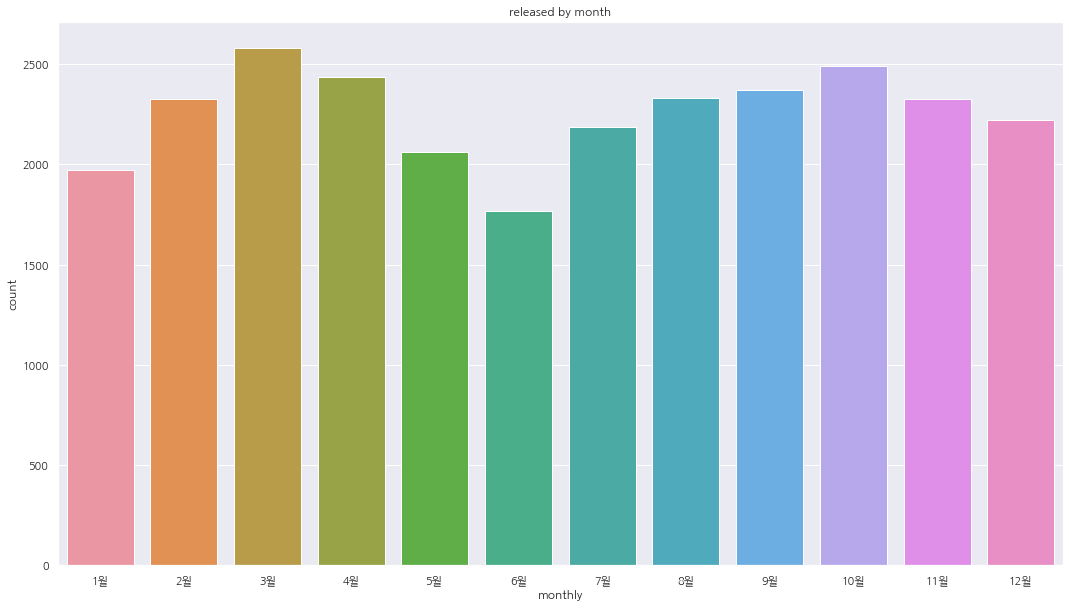

In [27]:


game['monthly'] = game['release_date'].dt.month

months = []
arr = game['monthly'].unique()
arr.sort()
for i in arr:
    months.append(str(i) + "월")

plt.figure(figsize=(18,10))

plt.subplot()
monthly_plot = sns.countplot(data = game , x = "monthly")
plt.title("released by month")

monthly_plot.set_xticklabels(months)

## 🔹게임 이용 연령(최소)별 게임 수

#### - 전체이용가가 압도적으로 많음
#### - 전체이용가를 제외하고 비교할 시에는 18세 이상의 게임이 가장 많이 존재한다.


In [9]:
game["required_age"] = game["required_age"].astype(str)
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   developer         27075 non-null  object        
 3   publisher         27075 non-null  object        
 4   platforms         27075 non-null  object        
 5   required_age      27075 non-null  object        
 6   categories        27075 non-null  object        
 7   genres            27075 non-null  object        
 8   steamspy_tags     27075 non-null  object        
 9   achievements      27075 non-null  int64         
 10  positive_ratings  27075 non-null  int64         
 11  negative_ratings  27075 non-null  int64         
 12  average_playtime  27075 non-null  int64         
 13  owners            27075 non-null  object        
 14  price             2707

In [10]:
# 연령별 데이터 값 변경하기

for i in game["required_age"].unique():
    if str(i) != "0":
        game = game.replace({"required_age": i }, str(i) + "세 이상")
    else:
        game = game.replace({"required_age": i }, "전체이용가")

game["required_age"].unique()
game["required_age"].value_counts()

전체이용가     26479
18세 이상      308
16세 이상      192
12세 이상       73
7세 이상        12
3세 이상        11
Name: required_age, dtype: int64

Text(0.5, 1.0, '게임 이용 연령별 게임 수')

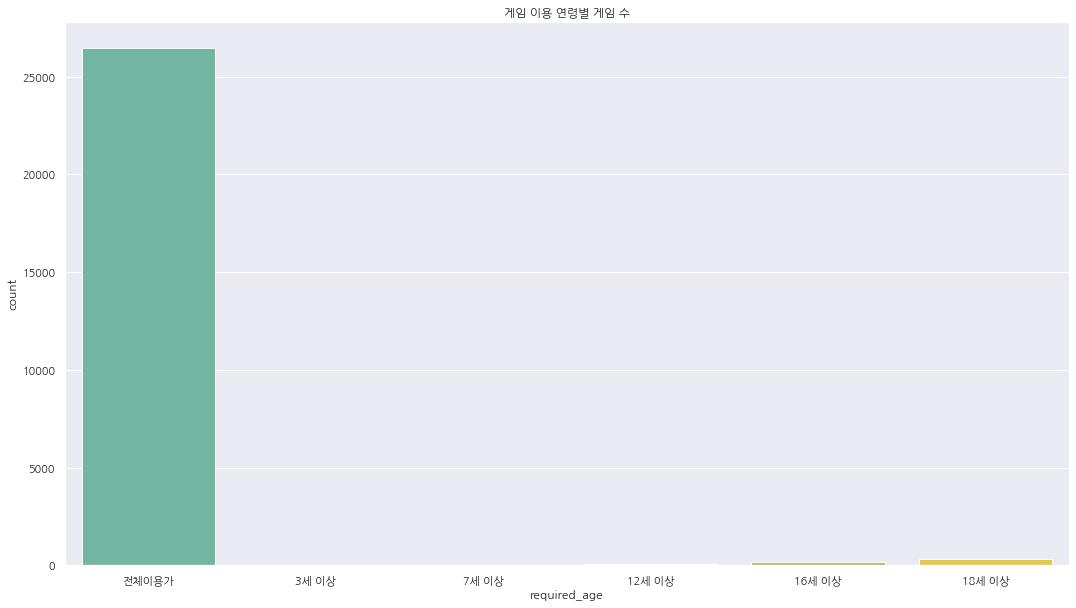

In [26]:
plt.figure(figsize=(18,10))

plt.subplot()
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(font="NanumGothic",
        style='darkgrid')
sns.countplot(data = game , x = "required_age", palette="Set2", order = ['전체이용가', '3세 이상', '7세 이상', '12세 이상', '16세 이상', '18세 이상'])
plt.title("게임 이용 연령별 게임 수")


{'18세 이상': 308, '16세 이상': 192, '12세 이상': 73, '7세 이상': 12, '3세 이상': 11}


([<matplotlib.patches.Wedge at 0x23a27d90be0>,
 [Text(-0.06322427556017152, 1.1983332971172467, '18세 이상'),
  Text(-0.4817449801048601, -0.9888992740131667, '16세 이상'),
  Text(0.9715634122076278, -0.7043184904994838, '12세 이상'),
  Text(1.131580817336484, -0.20499964350236044, '7세 이상'),
  Text(1.2978153345105192, -0.0753349687021183, '3세 이상')])

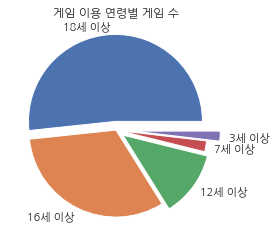

In [12]:
# 전체 이용가 제외하고 barplot 그리기

age_dict = dict(game.required_age.value_counts())
age_dict.pop("전체이용가")
print(age_dict)
labels = '18세 이상', '16세 이상', '12세 이상', '7세 이상', '3세 이상'
explode = [0.1, 0, 0.1, 0.05, 0.2]
plt.title('게임 이용 연령별 게임 수')
plt.pie(age_dict.values(), explode=explode, labels = labels)

## 🔹 운영체제별 이용 가능한 게임  수

#### - windows에서는 대부분이 가능하다. => 따라서 컴퓨터를 추천한다면 windows 운영체제 type 추천하는 등

In [13]:
platform_set = set()
for i in game.platforms.str.split(';'):
    platform_set.update(i)
platform_set

{'linux', 'mac', 'windows'}

In [14]:
platform_sets = game.platforms.str.split(';').apply(set)
dict = {}
dict['windows'] = platform_sets.apply(lambda row: 'windows' in row)
dict['linux'] = platform_sets.apply(lambda row: 'linux' in row)
dict['mac'] = platform_sets.apply(lambda row: 'mac' in row)
game = game.assign(**dict)

In [15]:
platforms_count = game[game.columns & platform_set].sum()
platforms_count = platforms_count.sort_values(ascending=False)
platforms_count / len(game)

<ipython-input-15-61c412da8fa1>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  platforms_count = game[game.columns & platform_set].sum()


windows    0.999815
mac        0.297913
linux      0.193352
dtype: float64

<ipython-input-16-849643c5d89d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  platforms.set_yticklabels(['{:,.0%}'.format(y) for y in vals])


Text(0.5, 0, 'Platform')

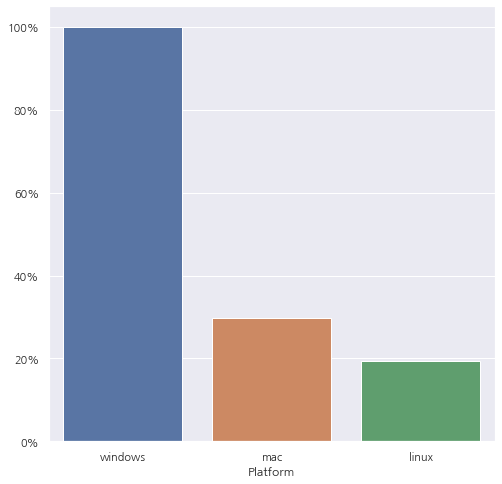

In [16]:
plt.figure(figsize=(8,8))


platforms = sns.barplot(x=platforms_count.index, y=platforms_count / len(game))

vals = platforms.get_yticks()
platforms.set_yticklabels(['{:,.0%}'.format(y) for y in vals])

# plt.xlabel('Percents of games that support platform')
plt.xlabel('Platform')

## 🔹 카테고리별 이용 가능한 게임  수

#### - 분석이 더 필요함! 카테고리별 hue = 연도로 해서 분석해보기

In [17]:
categories_set = set()
for i in game.categories.str.split(';'):
    categories_set.update(i)
categories_set

{'Captions available',
 'Co-op',
 'Commentary available',
 'Cross-Platform Multiplayer',
 'Full controller support',
 'In-App Purchases',
 'Includes Source SDK',
 'Includes level editor',
 'Local Co-op',
 'Local Multi-Player',
 'MMO',
 'Mods',
 'Mods (require HL2)',
 'Multi-player',
 'Online Co-op',
 'Online Multi-Player',
 'Partial Controller Support',
 'Shared/Split Screen',
 'Single-player',
 'Stats',
 'Steam Achievements',
 'Steam Cloud',
 'Steam Leaderboards',
 'Steam Trading Cards',
 'Steam Turn Notifications',
 'Steam Workshop',
 'SteamVR Collectibles',
 'VR Support',
 'Valve Anti-Cheat enabled'}

In [18]:
dict = {}
category_set = game.categories.str.split(';').apply(set)
for category in categories_set:
    game[category] = category_set.apply(lambda row: category in row)
game = game.assign(**dict)

<ipython-input-19-a2531af6120d>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  category_count = game[game.columns & categories_set].sum()
<ipython-input-19-a2531af6120d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


Text(0.5, 1.0, 'Percentage of categories')

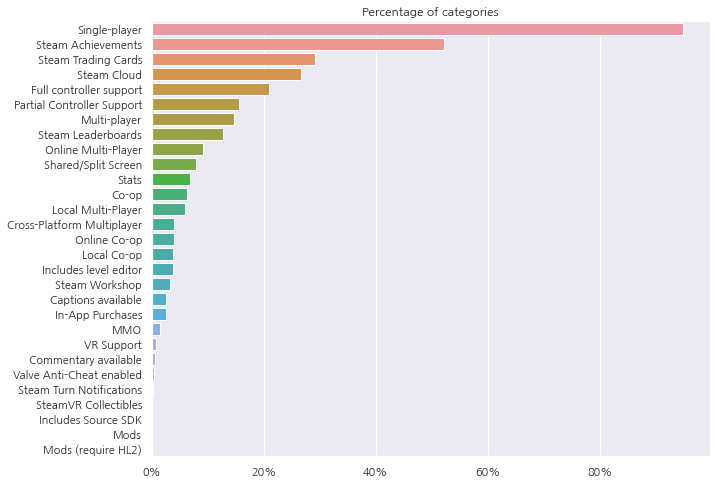

In [19]:
category_count = game[game.columns & categories_set].sum()
category_count = category_count.sort_values(ascending=False)

plt.figure(figsize=(10,8))
g = sns.barplot(y=category_count.index, x=category_count/len(game))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

g.set_title("Percentage of categories")

## 🔹 장르별 이용 가능한 게임  수

#### - Indie, Action, Casual 순으로 분포한다.
#### - 연도가 지남에 따라 어떻게 변화했는지 분석 좀 더 필요!

In [20]:
genres_set = set()
for i in game.genres.str.split(';'):
    genres_set.update(i)
genres_set

{'Accounting',
 'Action',
 'Adventure',
 'Animation & Modeling',
 'Audio Production',
 'Casual',
 'Design & Illustration',
 'Documentary',
 'Early Access',
 'Education',
 'Free to Play',
 'Game Development',
 'Gore',
 'Indie',
 'Massively Multiplayer',
 'Nudity',
 'Photo Editing',
 'RPG',
 'Racing',
 'Sexual Content',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Tutorial',
 'Utilities',
 'Video Production',
 'Violent',
 'Web Publishing'}

In [21]:
dict = {}
genre_sets = game.genres.str.split(';').apply(set)
for genre in genres_set:
    dict[genre] = genre_sets.apply(lambda row: genre in row)
game = game.assign(**dict)

<ipython-input-22-c8c84bc1b4af>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])


Text(0.5, 1.0, 'Percentage of genres')

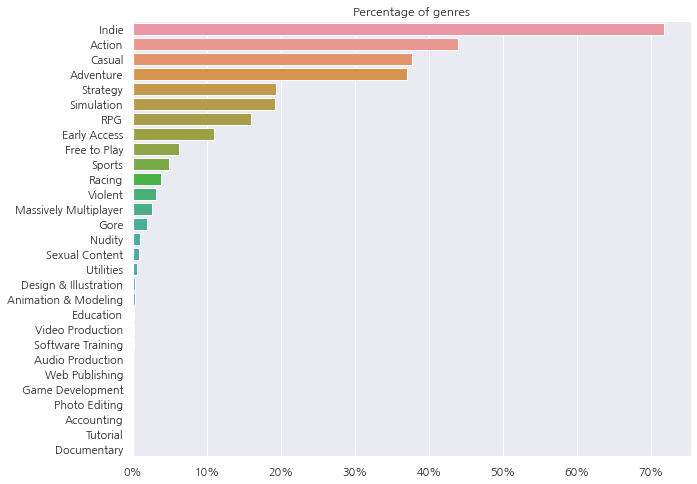

In [22]:
genres_count = game[genres_set].sum()
genres_count = genres_count.sort_values(ascending=False)

plt.figure(figsize=(10,8))
g = sns.barplot(y=genres_count.index, x=genres_count/len(game))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
g.set_title("Percentage of genres")

## 🔹 게임 가격 분포

#### - 대부분이 유료 게임입니다. 그래도 2560개의 무료게임도 존재한다.

2560 24515


([<matplotlib.patches.Wedge at 0x23a28fddc70>,
 [Text(1.1474469082530507, 0.35123438433689097, '무료 게임'),
  Text(-1.0518263250291653, -0.32196487692858844, '유료 게임')],
 [Text(0.6693440298142797, 0.20488672419651974, '9.5%'),
  Text(-0.5737234500159082, -0.17561720559741184, '90.5%')])

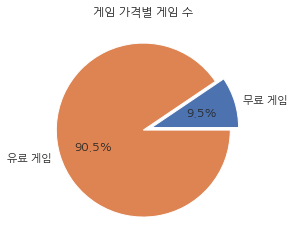

In [23]:
free, not_free = game[game['price'] == 0].shape[0], game[game['price'] != 0].shape[0]

print(free, not_free)
labels = '무료 게임','유료 게임'
explode = [0.1, 0]
plt.title('게임 가격별 게임 수')
plt.pie([free, not_free], explode=explode, labels = labels,autopct='%1.1f%%')

## 🔹 리뷰가 백만개 이상 Top 5

#### - 특징을 보면 장르가 모두 Action, 운영체제는 windows, tag => survival, 대부분 전체이용가

In [24]:
game = game.assign(**{'overall_reviews':game.positive_ratings + game.negative_ratings})
game = game.assign(**{'positive_rate':game.positive_ratings / game.overall_reviews})

In [25]:
a = game[game["overall_reviews"] > 100000].sort_values("positive_rate")
a.head()

,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,...,Nudity,RPG,Indie,Sexual Content,Accounting,Early Access,Racing,Gore,overall_reviews,positive_rate
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,PUBG Corporation,PUBG Corporation,windows,전체이용가,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,...,False,False,False,False,False,False,False,False,983260,0.504632
2563,No Man's Sky,2016-08-12,Hello Games,Hello Games,windows,전체이용가,Single-player;Multi-player;Online Multi-Player...,Action;Adventure,Open World;Space;Exploration,27,...,False,False,False,False,False,False,False,False,119932,0.529000
7809,Z1 Battle Royale,2018-02-28,NantG,Daybreak Game Company,windows,전체이용가,Multi-player;Online Multi-Player;In-App Purchases,Action;Adventure;Free to Play;Massively Multip...,Survival;Massively Multiplayer;Multiplayer,0,...,False,False,False,False,False,False,False,False,203098,0.548671
1506,DayZ,2018-12-13,Bohemia Interactive,Bohemia Interactive,windows,18세 이상,Multi-player;Online Multi-Player;Steam Worksho...,Action;Adventure;Massively Multiplayer,Survival;Zombies;Open World,0,...,False,False,False,False,False,False,False,False,195604,0.605484
1607,Heroes & Generals,2016-10-18,RETO MOTO,RETO MOTO,windows,전체이용가,Multi-player;Online Multi-Player;MMO;Online Co...,Action;Free to Play;Indie;Massively Multiplayer,Free to Play;World War II;Multiplayer,0,...,False,False,True,False,False,False,False,False,100272,0.656774
